In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##Задача 1
* Постройте график
* Назовите график
* Сделайте именование оси x и оси y
* Сделайте выводы

1.1. Скачать данные по ссылке

In [10]:
url = "https://drive.google.com/file/d/1xrx4_QURjMTfpF6OU4nzCPU4q3JdgLDb/view?usp=sharing"
df = pd.read_csv('https://drive.google.com/uc?id=' + url.split('/')[-2], parse_dates = ['date'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


1.2 Изучите стоимости недвижимости

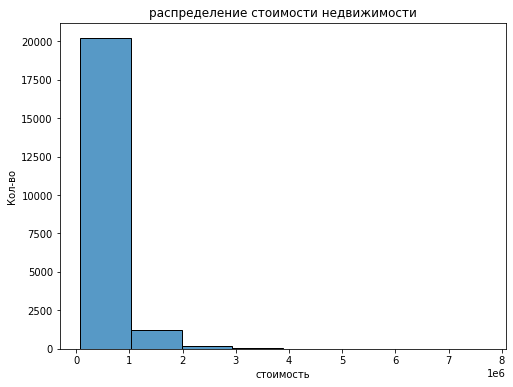

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=8);
plt.title('распределение стоимости недвижимости')
plt.xlabel('стоимость')
plt.ylabel('кол-во');

###Вывод:
Большенство предложений имеет цену до одного миллиона

1.3 Изучите распределение квадратуры жилой

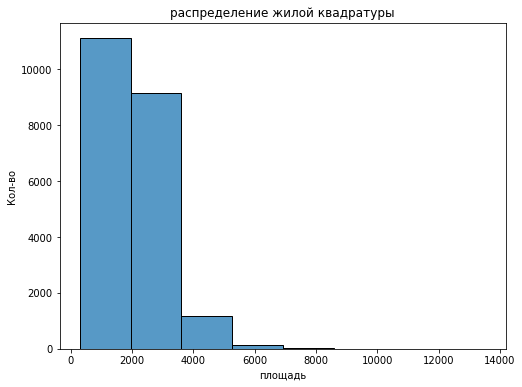

In [40]:
plt.figure(figsize=(8, 6))
sns.histplot(df['sqft_living'], bins=8);
plt.title('распределение жилой квадратуры')
plt.xlabel('площадь')
plt.ylabel('кол-во');

###Вывод:
Лидируют дома с квадратурой до 2000, следом идут дома с квадратурой от 2000 до ~3800

1.4 Изучите распределение года постройки

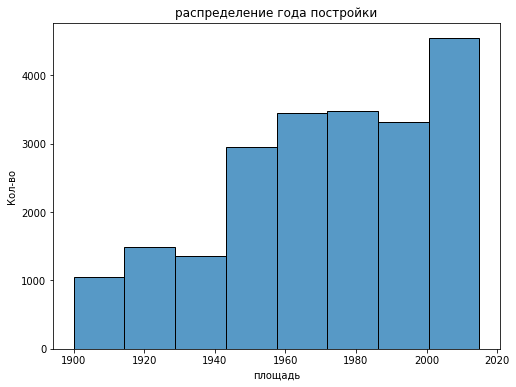

In [101]:
plt.figure(figsize=(8, 6))
sns.histplot(df['yr_built'], bins=8);
plt.title('распределение года постройки')
plt.xlabel('площадь')
plt.ylabel('кол-во');

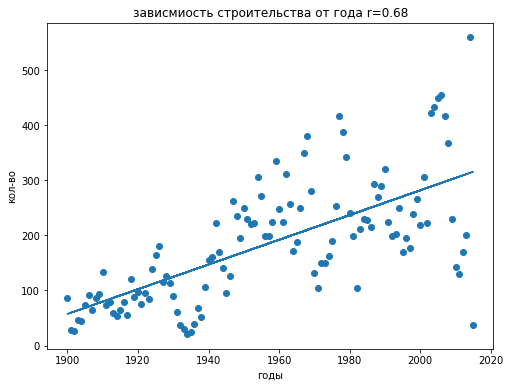

In [139]:
yr_built_counts = df.yr_built.value_counts()
x = np.array(yr_built_counts.index.tolist())
y = np.array(yr_built_counts.tolist())
b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
b0 = np.mean(y) - b1 * np.mean(x)
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.title(f"зависмиость строительства от года r={np.corrcoef(x, y)[1][0]:.2f}")
plt.plot(x, b0 + b1 * x)
plt.xlabel('годы')
plt.ylabel('кол-во')
plt.show()

###Вывод:
Наблюдается средняя прямая линейная зависимоть между временем и темпами строительства, количества вводимого жилья линейно увеличивается год к году.

##Задача 2
* Постройте график
* Сделайте выводы

2.1 Изучите распределение домов от наличия вида на набережную

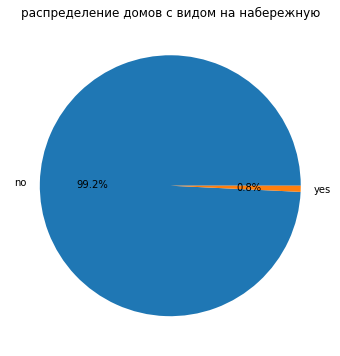

In [188]:
waterfront_counts = df.waterfront.apply(lambda value: 'yes' if (value != 0) else 'no').value_counts()
plt.figure(figsize=(8, 6))
plt.pie(waterfront_counts, autopct='%1.1f%%', labels=waterfront_counts.index)
plt.title('распределение домов с видом на набережную');

In [135]:
df.groupby('waterfront').agg({'price': ['mean']}).round()

,price
,mean
waterfront,
0,531564.0
1,1661876.0


###Вывод:
Количество домов с видом на набережную составляет менее процента, что обуславливает их всокую стоимость по сравнению другими домами.

2.2 Изучите распределение этажей домов

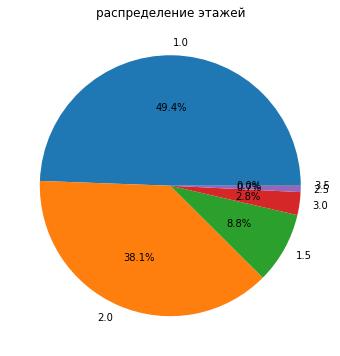

In [143]:
floor_counts = df.floors.value_counts()
plt.figure(figsize=(8, 6))
plt.pie(floor_counts, autopct='%1.1f%%', labels=floor_counts.index)
plt.title('распределение этажей');

###Вывод:
Больше всего одноэтажных и двухэтажных домов, на их долю приходиться 87,5%.

2.2 Изучите распределение состояния домов

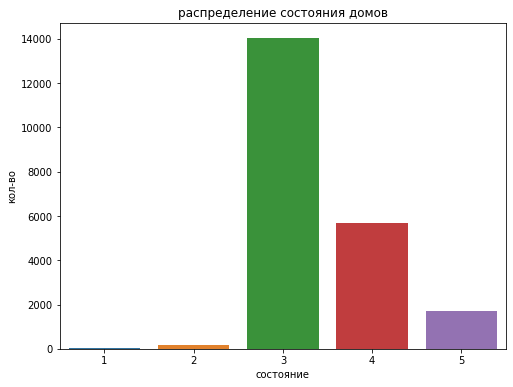

In [163]:
condition_counts = df.condition.value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x = condition_counts.index, y = condition_counts)
plt.title('распределение состояния домов')
plt.xlabel('состояние')
plt.ylabel('кол-во');

###Вывод:
Больше всего домов в удовлетворительном состоянии.

##Задача 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [189]:
df['waterfront_description'] = df.waterfront.apply(lambda value: 'yes' if (value != 0) else 'no')
view_price = pd.crosstab(index = df['view'], columns = df['waterfront_description'], values = df['price'], aggfunc='mean').reset_index().round()
view_price

waterfront_description,view,no,yes
0,0,496564.0,NaN
1,1,812816.0,635000.0
2,2,783609.0,1841875.0
3,3,964205.0,1172500.0
4,4,1270030.0,1727691.0


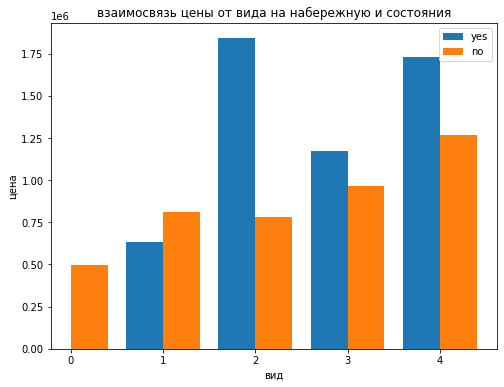

In [190]:
plt.figure(figsize=(8, 6))
n_ticks = np.arange(len(view_price['view']))
offset = 0.2
w = 0.4
plt.bar(n_ticks - offset, view_price['yes'], width=w)
plt.bar(n_ticks + offset, view_price['no'], width=w)
plt.title('взаимосвязь цены от вида на набережную и состояния')
plt.xlabel('вид')
plt.ylabel('цена')
plt.legend(['yes', 'no'])
plt.xticks(n_ticks, view_price['view']);

###Вывод:
График показывает, что при неважном состоянии недвижимости наличие хорошего вида значително увеличивает ее цену